## Load Data

In [6]:
# fashion_mnist
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Reshape Data

In [7]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## Weight Increasing (std=1)

In [8]:
# solution 1: increase weight value

initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(10))


# optimizer and loss
model.compile(optimizer=keras.optimizers.SGD(), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

# training
batch_size = 512
history = model.fit(X_train, y_train, batch_size,
                    validation_data=(X_test, y_test),
                    epochs=300, verbose=2)

# 118/118 - 0s - loss: 0.6084 - accuracy: 0.7797 - val_loss: 0.6930 - val_accuracy: 0.7485 - 480ms/epoch - 4ms/step


Epoch 1/300
118/118 - 1s - loss: 2.3272 - accuracy: 0.1241 - val_loss: 2.2761 - val_accuracy: 0.1343 - 1s/epoch - 11ms/step
Epoch 2/300
118/118 - 0s - loss: 2.2557 - accuracy: 0.1626 - val_loss: 2.2346 - val_accuracy: 0.1814 - 474ms/epoch - 4ms/step
Epoch 3/300
118/118 - 0s - loss: 2.2115 - accuracy: 0.2071 - val_loss: 2.1883 - val_accuracy: 0.2219 - 482ms/epoch - 4ms/step
Epoch 4/300
118/118 - 0s - loss: 2.1607 - accuracy: 0.2462 - val_loss: 2.1355 - val_accuracy: 0.2521 - 481ms/epoch - 4ms/step
Epoch 5/300
118/118 - 0s - loss: 2.1037 - accuracy: 0.2788 - val_loss: 2.0760 - val_accuracy: 0.2842 - 498ms/epoch - 4ms/step
Epoch 6/300
118/118 - 1s - loss: 2.0404 - accuracy: 0.3086 - val_loss: 2.0115 - val_accuracy: 0.3183 - 502ms/epoch - 4ms/step
Epoch 7/300
118/118 - 0s - loss: 1.9735 - accuracy: 0.3368 - val_loss: 1.9450 - val_accuracy: 0.3421 - 471ms/epoch - 4ms/step
Epoch 8/300
118/118 - 0s - loss: 1.9071 - accuracy: 0.3609 - val_loss: 1.8803 - val_accuracy: 0.3610 - 481ms/epoch - 4ms

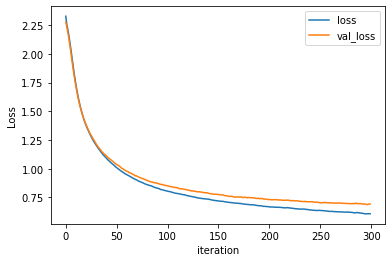

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

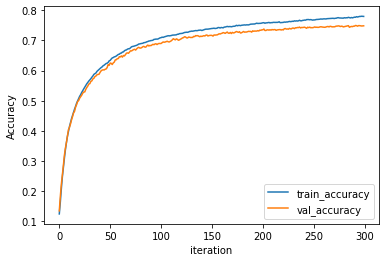

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()